In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data_Analyst_Assignment_Dataset.csv')
print('Data loaded successfully.')
df.head()

Data loaded successfully.


,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA


In [3]:
df.describe()

,Amount Pending,Tenure,Interest Rate,Disbursed Amount
count,24582.000000,24582.000000,24582.000000,24582.000000
mean,1791.172687,9.415263,0.934960,17705.195468
std,937.565507,3.238904,3.114732,14192.671509
min,423.000000,7.000000,0.000000,2793.000000
25%,1199.000000,8.000000,0.000000,9857.750000
50%,1593.000000,8.000000,0.000000,13592.000000
75%,2083.000000,11.000000,0.000000,19968.000000
max,13349.000000,24.000000,37.920000,141072.000000


In [4]:
df.isnull().sum()

Amount Pending      0
State               0
Tenure              0
Interest Rate       0
City                0
Bounce String       0
Disbursed Amount    0
Loan Number         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
from datetime import datetime
from tqdm.notebook import tqdm

tqdm.pandas()

# Define the function to calculate risk labels
def calculate_risk_label(bounce_string):
    # New customers (Unknown risk)
    if pd.isna(bounce_string):
        return 'Unknown risk'
    
    # Count the number of bounces in the last 6 months, excluding the last month
    recent_bounces = bounce_string[-6:-1].count('B')
    
    # Low risk
    if recent_bounces == 0:
        return 'Low risk'
    # Medium risk
    elif recent_bounces < 2:
        return 'Medium risk'
    # High risk
    else:
        return 'High risk'

# Apply the function to the 'Bounce String' column
df['Risk Label'] = df['Bounce String'].progress_apply(calculate_risk_label)

print('Risk labels calculated successfully.')
print(df.head())

  0%|          | 0/24582 [00:00<?, ?it/s]

Risk labels calculated successfully.
   Amount Pending      State  Tenure  Interest Rate       City Bounce String  \
0             963  Karnataka      11           7.69  Bangalore           SSS   
1            1194  Karnataka      11           6.16  Bangalore           SSB   
2            1807  Karnataka      14           4.24     Hassan           BBS   
3            2451  Karnataka      10           4.70  Bangalore           SSS   
4            2611  Karnataka      10           4.41     Mysore           SSB   

   Disbursed Amount Loan Number Risk Label  
0             10197       JZ6FS   Low risk  
1             12738       RDIOY   Low risk  
2             24640       WNW4L  High risk  
3             23990       6LBJS   Low risk  
4             25590       ZFZUA   Low risk  


In [9]:
# Assuming 'Tenure' column represents the total tenure of the loan in months
# and there's no direct column indicating the current month of tenure for each customer,
# we'll label customers based on the provided criteria.

def label_tenure(tenure, disbursed_amount, amount_pending):
    # Early tenure: Customers who are in the book for 3 months
    if disbursed_amount - amount_pending <= (disbursed_amount / tenure) * 3:
        return 'Early tenure'
    # Late tenure: Customers who are 3 months away from closing the loan
    elif amount_pending <= (disbursed_amount / tenure) * 3:
        return 'Late tenure'
    # Mid tenure: Everyone else
    else:
        return 'Mid tenure'

# Apply the function to label tenure
# Note: This approach assumes linear payment over the tenure, which might not be accurate for all loan types.
df['Customer Tenure Label'] = df.apply(lambda x: label_tenure(x['Tenure'], x['Disbursed Amount'], x['Amount Pending']), axis=1)

print('Customer tenure labels applied successfully.')
df.head()

Customer tenure labels applied successfully.


,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Customer Tenure Label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low risk,Late tenure
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,Low risk,Late tenure
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High risk,Late tenure
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low risk,Late tenure
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,Low risk,Late tenure


In [10]:
import pandas as pd
import numpy as np
from tqdm import tqdm

tqdm.pandas()

df = pd.read_csv('Data_Analyst_Assignment_Dataset.csv')

# Sort the dataframe by 'Amount Pending' in descending order to ensure we distribute based on ticket size
df_sorted = df.sort_values(by='Amount Pending', ascending=False)

# Calculate the total amount pending
total_amount_pending = df_sorted['Amount Pending'].sum()

# Define the threshold for each cohort to have approximately equal sum of amount pending
threshold = total_amount_pending / 3

# Initialize counters and labels
current_sum = 0
current_cohort = 1
labels = []

# Distribute the data into cohorts
for amount in tqdm(df_sorted['Amount Pending']):
    current_sum += amount
    if current_sum > threshold:
        current_cohort += 1
        current_sum = amount
    labels.append('Low ticket size' if current_cohort == 1 else ('Medium ticket size' if current_cohort == 2 else 'High ticket size'))

# Apply the labels to the dataframe
df_sorted['Ticket Size Label'] = labels

# Since the dataframe was sorted for processing, reset the index to match the original order
df['Ticket Size Label'] = df_sorted.sort_index()['Ticket Size Label']

print('Ticket size labels applied successfully.')
df.head()

100%|███████████████████████████████████████████████████████████████████████| 24582/24582 [00:00<00:00, 1214636.05it/s]

Ticket size labels applied successfully.


,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Ticket Size Label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,High ticket size
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High ticket size
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,Medium ticket size
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low ticket size
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,Low ticket size


Bounce counts plotted successfully.
Average interest rate for bounced loans: 0.87%
Average interest rate for non-bounced loans: 1.44%


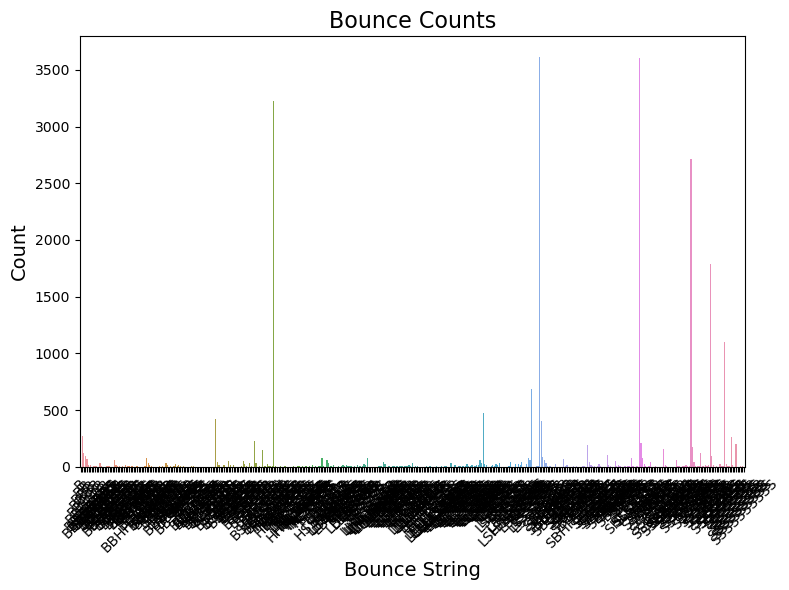

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data_Analyst_Assignment_Dataset.csv')

# Convert 'Bounce String' to a binary column
df['Bounced'] = df['Bounce String'].apply(lambda x: 1 if x != 'SSS' else 0)

# Group by 'Bounce String' and count the occurrences
bounce_counts = df.groupby('Bounce String').size().reset_index(name='Count')

# Plot the bounce counts
plt.figure(figsize=(8, 6), facecolor='white')
sns.barplot(x='Bounce String', y='Count', data=bounce_counts)
plt.title('Bounce Counts', fontsize=16)
plt.xlabel('Bounce String', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

print('Bounce counts plotted successfully.')

# Calculate the average interest rate for bounced and non-bounced loans
avg_interest_rate_bounced = df[df['Bounced'] == 1]['Interest Rate'].mean()
avg_interest_rate_non_bounced = df[df['Bounced'] == 0]['Interest Rate'].mean()

print(f'Average interest rate for bounced loans: {avg_interest_rate_bounced:.2f}%')
print(f'Average interest rate for non-bounced loans: {avg_interest_rate_non_bounced:.2f}%')

In [13]:
# Segment borrowers based on location (assuming 'City' column indicates metropolitan areas), bounce behavior, and EMI size
# For simplicity, let's assume EMI size is directly related to 'Disbursed Amount'

# Define metropolitan areas (for demonstration purposes, let's assume a few cities as metropolitan)
metropolitan_areas = ['Bangalore', 'Mumbai', 'Delhi', 'Kolkata', 'Chennai']

# Segment based on location and interest rate
df['Language Preference'] = df.apply(lambda x: 'English' if (x['City'] in metropolitan_areas and x['Interest Rate'] < df['Interest Rate'].median()) else 'Hindi', axis=1)

# Segment based on bounce behavior
df['Bounce Behavior'] = df['Bounce String'].apply(lambda x: 'Low' if x == 'SSS' else 'High')

# Segment based on EMI size (using 'Disbursed Amount' as a proxy)
df['EMI Size'] = pd.qcut(df['Disbursed Amount'], 3, labels=['Low', 'Medium', 'High'])

# Allocate communication channels
def allocate_channel(row):
    if row['Language Preference'] == 'English' and row['Bounce Behavior'] == 'Low' and row['EMI Size'] in ['Low', 'Medium']:
        return 'Voice Bot'
    elif row['Bounce Behavior'] == 'High' or row['EMI Size'] == 'High':
        return 'Human Calling'
    else:
        return 'WhatsApp Bot'

df['Communication Channel'] = df.apply(allocate_channel, axis=1)

# Calculate overall spend
def calculate_cost(channel):
    if channel == 'WhatsApp Bot':
        return 5
    elif channel == 'Voice Bot':
        return 10
    else:
        return 50

df['Cost'] = df['Communication Channel'].apply(calculate_cost)

overall_spend = df['Cost'].sum()

print('Borrowers segmented and channels allocated successfully.')
print(f'Overall spend: Rs. {overall_spend}')
df[['City', 'Interest Rate', 'Bounce String', 'Disbursed Amount', 'Language Preference', 'Bounce Behavior', 'EMI Size', 'Communication Channel', 'Cost']].head()

Borrowers segmented and channels allocated successfully.
Overall spend: Rs. 1140135


,City,Interest Rate,Bounce String,Disbursed Amount,Language Preference,Bounce Behavior,EMI Size,Communication Channel,Cost
0,Bangalore,7.69,SSS,10197,Hindi,Low,Low,WhatsApp Bot,5
1,Bangalore,6.16,SSB,12738,Hindi,High,Medium,Human Calling,50
2,Hassan,4.24,BBS,24640,Hindi,High,High,Human Calling,50
3,Bangalore,4.70,SSS,23990,Hindi,Low,High,Human Calling,50
4,Mysore,4.41,SSB,25590,Hindi,High,High,Human Calling,50


In [19]:
df.to_excel('Modified_Excel_File.xlsx')